<left>
    <a href=img><img src = "https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/Misc/1c86bfb3-cab0-4255-99bf-24c5488d888a-1632765661247.png?raw=true" width="400"  />
</left>

###### Developed by Tiago Moraes (13.02.2022)

# Data Science Test - Part III

----

The following notebooks presents the complete dataset analysis, exploration and pre-processing steps required to implement a tailored machine learning model designed to **predict the total minutes** ('total_minutes' label) it takes to a shopper to complete a given order.

For that, **3 different notebooks** were prepared for each task, as following:

- **[1. ETL process notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/1.ETL_-_Data_Science_Test.ipynb)** Complete ETL (data wrangling) process of the provided datasets, including feature engineering, feature transformations, and data standardizations, necessary to carry out all the statistics tests necessaries in the next phase;

- **[2. EDA notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/2.EDA_-_Data_Science_Test.ipynb)** Statistical exploration and understanding of the pre-processed dataset. Needed to define the best machine learning strategy for the target Label;

- **[3. Machine Learning Model development notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/3.ML_Model_-_Data_Science_Test.ipynb)** Build, train and test a ML model that takes in the process the dataset, generates a model and deploy it with unseen data to generate predictions ("total_minutes" label)
<br />
<br />

This notebook catches up from the previous one (2.EDA - Data Science Test.ipynb) and uses the processed file throughout the entire Machine Learning modeling process.

# 3. Machine Learning modeling - Model definition, training and serving


----

## 1. Importing necessary modules and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from scipy.stats import uniform, randint
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

### 1.1 Loading dataset "df_EDA.csv" obtained from the EDA notebook

After loading the df_EDA.csv into a dataframe called **df_EDA**, let's look at the first five rows using the `head()` function:

In [2]:
filename_EDA = r"C:\Users\tiago\OneDrive\00 Pessoal\Outros\Documentos\Python Scripts\Github\CS-s-Data-Science-Test/df_EDA.csv"
df_EDA = pd.read_csv(filename_EDA)
df_EDA.head()

,Unnamed: 0,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
0,0,1,1,19,0.9024,1.30,0.92,4.76,1.818407,67.684264
1,1,1,1,34,0.9024,1.30,0.92,4.76,0.961885,160.336211
2,4,0,4,29,0.8138,1.89,0.84,4.68,3.316783,94.734479
3,5,0,1,10,0.8456,1.93,0.96,4.80,2.704810,74.532256
4,6,0,1,7,0.8456,1.93,0.96,4.80,2.831756,91.192812


In [3]:
#removing the first column ("Unnamed: 0")
df_EDA.drop(['Unnamed: 0'], axis = 1, inplace = True)

## 2. Model definition

Given that this is a regresion problem, this section focused on building several different regression models and test their performance (accuracy and MSE wise). In the end, we compare the performance scores from each model against each other to define which one is the best to predict `total_minutes` label.</br>
</br>
Considering the wide diiferent types of regression models, teh following were chosen to be fully tested for this case:</br> 
</br>
2.1 Linear Regression</br>
</br>
2.2 Multivariate Linear Regression</br>
</br>
2.3 Polynomial Regression</br>
</br>
2.4 XGBoost</br>
</br>
2.5 Deep Neural Network (DNN)</br>

### 2.1. Linear Regression

In [4]:
XLR=df_EDA[['order_size']].values
yLR=df_EDA['total_minutes']
XLR.shape, yLR.shape

((7310, 1), (7310,))

Now we simply split the data into **training** and **testing** sets and build the ML models.

In [5]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size = 0.2, random_state = 0)
X_trainLR.shape, y_testLR.shape, X_testLR.shape, y_trainLR.shape

((5848, 1), (1462,), (1462, 1), (5848,))

In [6]:
regressor = LinearRegression()
regressor.fit(X_trainLR, y_trainLR)
Y_predLR = regressor.predict(X_testLR)

ActVPred = pd.DataFrame({'Actual': y_testLR, 'Predicted': Y_predLR})
print(ActVPred)

#Checking the accuracy 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testLR, Y_predLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_testLR, Y_predLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testLR, Y_predLR)))
print('R-square: = ', regressor.score(X_testLR, y_testLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 20.423629805771597
Mean Squared Error: 694.0734600430256
Root Mean Squared Error: 26.34527396029553
R-square: =  0.3230203766499511


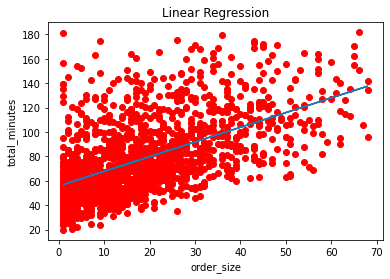

In [7]:
plt.plot(X_testLR,y_testLR, 'ro')
plt.plot(X_testLR, Y_predLR)
plt.xlabel('order_size')
plt.ylabel('total_minutes')
plt.title('Linear Regression')
plt.show()

In [8]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x = df_EDA['order_size'], y = df_EDA['total_minutes'], title  = 'Completion Time vs Order Complexity', labels = {'x':'Order size', 'y':'Total minutes'})
fig.add_trace(go.Scatter(x = X_testLR.reshape(1462), y = Y_predLR, mode = "lines", name = "Model"))
fig.show()

### 2.2. Multivariate Linear Regression

In [140]:
X_MLR=df_EDA[['order_size','distance_km','on_demand']].values
y_MLR=df_EDA['total_minutes']
X_MLR.shape, y_MLR.shape

((7310, 3), (7310,))

In [141]:
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size = 0.2, random_state = 0)
X_train_MLR.shape, y_test_MLR.shape, X_test_MLR.shape, y_train_MLR.shape

((5848, 3), (1462,), (1462, 3), (5848,))

In [142]:
MLR = LinearRegression()
MLR.fit(X_train_MLR, y_train_MLR)
Y_predMLR = MLR.predict(X_test_MLR)

ActVPred = pd.DataFrame({'Actual': y_test_MLR, 'Predicted': Y_predLR})
print(ActVPred)

#Checking the accuracy 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR, Y_predMLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR, Y_predMLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR, Y_predMLR)))
print('R-square: = ', MLR.score(X_test_MLR, y_test_MLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 19.798908012131026
Mean Squared Error: 652.7338028885015
Root Mean Squared Error: 25.548655598455696
R-square: =  0.36334190908277886


C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



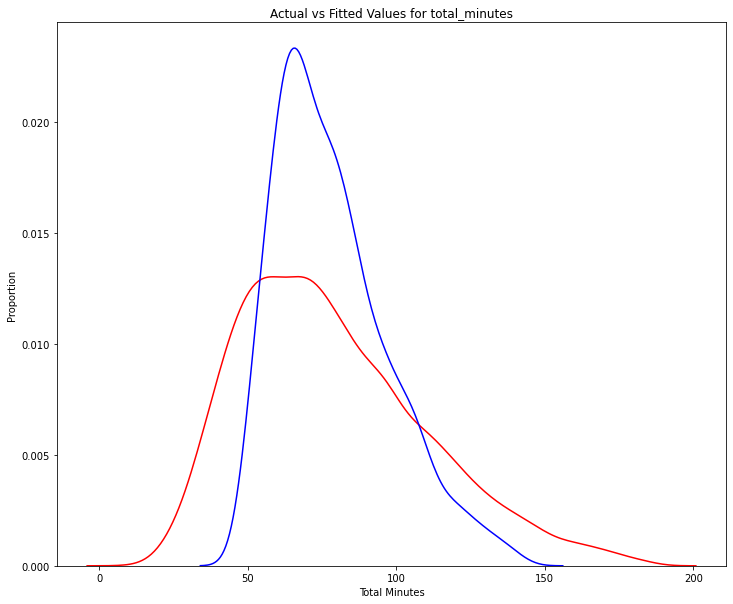

In [143]:
plt.figure(figsize=(12, 10))

ax1=sns.distplot(df_EDA['total_minutes'], hist=False, color='r',label='Actual Value')
sns.distplot(Y_predMLR, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title("Actual vs Fitted Values for total_minutes")
plt.xlabel('Total Minutes')
plt.ylabel('Proportion')

plt.show()
plt.close()

### 2.3. Polynomial

In [171]:
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(60,1,200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new,y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for total minutes ~ order_size')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('total_minutes')

    plt.show()
    plt.close()

In [172]:
X_Poly=df_EDA['order_size']
y_Poly=df_EDA['total_minutes']

In [173]:
f= np.polyfit(X_Poly,y_Poly,7) #7th order polynomial
p = np.poly1d(f)
print(p)

           7             6             5             4           3
4.471e-10 x - 1.252e-07 x + 1.417e-05 x - 0.0008199 x + 0.02536 x
           2
 - 0.4055 x + 4.2 x + 49.05


In [174]:
ActVPred = pd.DataFrame({'Actual': y_Poly, 'Predicted': p(X_Poly)})
print(ActVPred)

#Checking the accuracy 
print('Mean Absolute Error:', metrics.mean_absolute_error(df_EDA['total_minutes'], p(X_Poly)))
print('Mean Squared Error:', metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly))))
print('R-square: = ', r2_score(y_Poly, p(X_Poly)))

          Actual  Predicted
0      67.684264  79.144890
1     160.336211  98.228026
2      94.734479  92.370681
3      74.532256  68.946004
4      91.192812  65.525061
...          ...        ...
7305   97.731233  60.782096
7306   71.825023  52.863717
7307   38.001058  52.863717
7308   84.933859  52.863717
7309   44.399626  52.863717

[7310 rows x 2 columns]
Mean Absolute Error: 20.309019566375675
Mean Squared Error: 672.2230705688407
Root Mean Squared Error: 25.9272650036374
R-square: =  0.32435304108227914


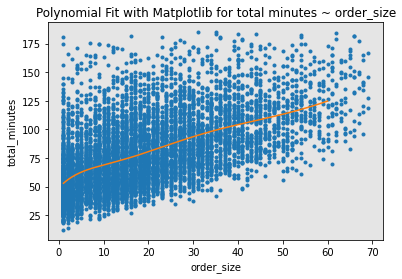

In [175]:
PlotPolly(p,X_Poly,y_Poly,'order_size')

### 2.4. XGBoost

In [78]:
scaler = StandardScaler()
sdss = scaler.fit_transform(df_EDA.drop('total_minutes', axis=1))
X_train, X_test, y_train, y_test = train_test_split(sdss, df_EDA['total_minutes'], random_state=42)
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)

ActVPred = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
print(ActVPred)

#Checking the accuracy 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-square: = ', xgb_model.score(X_test, y_test))


          Actual   Predicted
2572   71.381790   72.713249
1561   47.252292   88.037216
2805  102.377435   73.333176
6098   61.099135   79.828796
2957  101.491030   90.271645
...          ...         ...
6115   48.868788   49.212543
2890   70.732842   63.247971
4800   52.828519   70.935448
4267  134.952176  131.163437
29     77.389098   97.482483

[1828 rows x 2 columns]
Mean Absolute Error: 18.885975067373174
Mean Squared Error: 595.7935704112698
Root Mean Squared Error: 24.40888302260613
R-square: =  0.41632393680244684


In [ ]:
plt.plot(X_test,y_test, 'ro')
plt.plot(X_test, Y_pred)
plt.xlabel('order_size')
plt.ylabel('total_minutes')
plt.title('XGBoost Regression')
plt.show()

### 2.5. Deep Neural Network - DNN 

In [181]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=12, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation="linear"))

model.compile(
    optimizer=Adam(),
    loss='MSE',
    metrics=[tf.keras.metrics.MeanSquaredError()]
    )

M= model.fit(X_train_MLR, y_train_MLR, batch_size=12, epochs = 100, verbose=1, validation_data=(X_test_MLR, y_test_MLR))

Epoch 1/100
488/488 [==============================] - 1s 2ms/step - loss: 3174.0930 - mean_squared_error: 3174.0933 - val_loss: 1087.7772 - val_mean_squared_error: 1087.7772
Epoch 2/100
488/488 [==============================] - 1s 1ms/step - loss: 942.2929 - mean_squared_error: 942.2929 - val_loss: 891.9033 - val_mean_squared_error: 891.9033
Epoch 3/100
488/488 [==============================] - 1s 1ms/step - loss: 851.8398 - mean_squared_error: 851.8398 - val_loss: 847.6109 - val_mean_squared_error: 847.6109
Epoch 4/100
488/488 [==============================] - 1s 1ms/step - loss: 806.9954 - mean_squared_error: 806.9954 - val_loss: 800.5333 - val_mean_squared_error: 800.5333
Epoch 5/100
488/488 [==============================] - 1s 2ms/step - loss: 764.4125 - mean_squared_error: 764.4125 - val_loss: 772.2956 - val_mean_squared_error: 772.2956
Epoch 6/100
488/488 [==============================] - 1s 1ms/step - loss: 723.4717 - mean_squared_error: 723.4717 - val_loss: 736.8340 - val

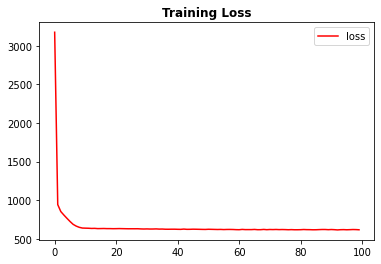

In [182]:
plt.plot(M.history['loss'], label='loss',color='red')
plt.title(label='Training Loss', weight ='bold')
plt.legend();

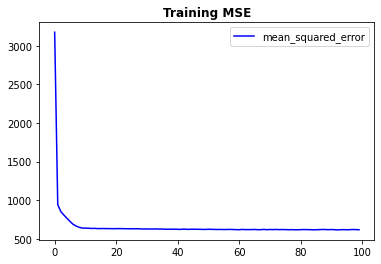

In [184]:
plt.plot(M.history['mean_squared_error'], label='mean_squared_error',color='blue')
plt.title(label='Training MSE', weight ='bold')
plt.legend();

In [185]:
yhat_DNN=model.predict(X_test_MLR, steps=1)
r2_score(y_test_MLR, yhat_DNN)
print('The R-square is: = ', r2_score(y_test_MLR, yhat_DNN))

The R-square is: =  0.3766135347309898


In [191]:
mse_DNN = mean_squared_error(y_test_MLR,yhat_DNN,squared=True)
print('The Mean squared error of the total_minutes variable is: ', mse_DNN)

The Mean squared error of the total_minutes variable is:  639.1270667086645


### 2.6. Models summary

In this section it´s presented the overall performance of each developed model and how they compare against each other

In [176]:
accuracy_score_model_R2 = {
    'Simple Linear Regression':regressor.score(X_testLR, y_testLR),
    'Multivariate Linear Regression':MLR.score(X_test_MLR, y_test_MLR),
    'Polynomial Regression (7th order)':r2_score(y_Poly, p(X_Poly)),
    'XGBoost': xgb_model.score(X_test, y_test),
    'DNN': r2_score(y_test_MLR, yhat_DNN)
}

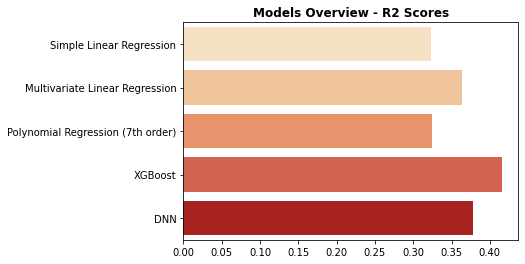

In [194]:
def models_overview(accuracy_score_model_R2):
    
    model_accuracy = list(accuracy_score_model_R2.values())
    model_name = list(accuracy_score_model_R2.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview - R2 Scores', weight='bold');
    return g
    
over_view = models_overview(accuracy_score_model_R2)

In [192]:
accuracy_score_model_MSE = {
    'Simple Linear Regression':metrics.mean_squared_error(y_testLR, Y_predLR),
    'Multivariate Linear Regression':metrics.mean_squared_error(y_test_MLR, Y_predMLR),
    'Polynomial Regression (7th order)':metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)),
    'XGBoost':metrics.mean_squared_error(y_test, Y_pred),
    'DNN':mean_squared_error(y_test_MLR,yhat_DNN,squared=True)
}

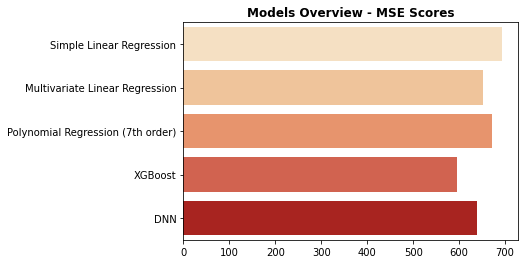

In [195]:
def models_overview(accuracy_score_model_MSE):
    
    model_accuracy = list(accuracy_score_model_MSE.values())
    model_name = list(accuracy_score_model_MSE.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview - MSE Scores', weight='bold');
    return g
    
over_view = models_overview(accuracy_score_model_MSE)

## 3. Model serving

For this section, we'll train several different regression models and test their performance (accuracy and MSE wise). In the end, we compare the performance scores from each model against each other to define which one is the best to predict the `total_minutes` label

### 3.1. Making predictions: df.TEST

In [111]:
features = pd.read_csv('https://raw.githubusercontent.com/tiagottmoraes/CS-s-Data-Science-Test/main/data/df_TEST.csv')

In [112]:
features.sample(2)

,Unnamed: 0,order_id,store_branch_id,shopper_id,store_lat,store_long,delivery_lat,delivery_long,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
181,812,0be92484991a5258f07fb5e38e2233f8,1679091c5a880faf6fb5e6087eb1b2dc,ee1165b8e0b337b4105b45f74a23a824,-33.370765,-70.512420,-33.345095,-70.52701,1,I,18,0.8859,1.22,1.0,4.76,3.154310,NaN
881,4149,4066e142808df3382cad77b0d8bfb6fd,1f0e3dad99908345f7439f8ffabdffc4,9dc27f69cc9f1f45b27b1bd86102e163,-33.386547,-70.568075,-33.420114,-70.58133,0,M,9,0.8645,3.14,1.0,4.56,3.921865,NaN


In [137]:
Xpred=features[['order_size','distance_km','on_demand']].values

In [100]:
#scaler = StandardScaler()
#Xpred = scaler.fit_transform(features.drop(['total_minutes','Unnamed: 0','order_id','store_branch_id','shopper_id','store_lat','store_long','delivery_lat','delivery_long'], axis=1))

In [164]:
# make predictions on the entire test dataset
yhat = MLR.predict(Xpred)
# connect predictions with outputs

def Predictions():
    for i in range(1995):
    	print(Xpred[i],yhat[i])

In [165]:
Predictions()

[38.          0.91634594  1.        ] 90.83822633211543
[32.          1.03314687  1.        ] 84.22472975943128
[41.          4.09963567  0.        ] 111.32182555007805
[17.          1.80010744  0.        ] 78.78267506278901
[6.         2.82470577 0.        ] 68.44046839087633
[43.         3.6192692  0.       ] 112.55543483322163
[3.         4.09963567 1.        ] 57.76229987778006
[13.          2.62173572  1.        ] 65.96244783352603
[23.          2.60798039  0.        ] 87.4299040368268
[13.          1.47501311  0.        ] 73.48740154350129
[7.         2.80250843 1.        ] 59.48965112552466
[14.          2.83867617  0.        ] 77.63171379761143
[11.          2.42200101  1.        ] 63.23302060091703
[67.          3.57963572  0.        ] 139.9498212883385
[58.          2.31205863  0.        ] 126.85632213652084
[39.          4.08690217  0.        ] 109.00368973604176
[42.          3.59935896  0.        ] 111.36657929696906
[12.          3.52108306  0.        ] 76.84247324552074


# 4. Conclusions